## Importing the Dependincies

In [579]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.metrics import r2_score

## Read Data Set

In [580]:
df = pd.read_csv('realtor-data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [533]:
df.shape

(306000, 10)

In [534]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,250076.0,3.491347,2.449591e+00,1.0,2.00,3.00,4.00,99.0
bath,251318.0,2.574726,2.568545e+00,1.0,2.00,2.00,3.00,198.0
acre_lot,239877.0,9.732298,5.308272e+02,0.0,0.16,0.43,1.59,100000.0
zip_code,305803.0,2552.165724,1.629820e+03,601.0,1605.00,2151.00,3052.00,99999.0
house_size,252557.0,2225.678298,3.665834e+03,100.0,1192.00,1748.00,2628.00,1450112.0
price,306000.0,768092.378265,1.297715e+06,1.0,249000.00,460000.00,799000.00,60000000.0


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306000 entries, 0 to 305999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          306000 non-null  object 
 1   bed             250076 non-null  float64
 2   bath            251318 non-null  float64
 3   acre_lot        239877 non-null  float64
 4   city            305948 non-null  object 
 5   state           306000 non-null  object 
 6   zip_code        305803 non-null  float64
 7   house_size      252557 non-null  float64
 8   prev_sold_date  109589 non-null  object 
 9   price           306000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 23.3+ MB


## Deleting Duplicated Rows and Handling Null Values 

In [581]:
df.duplicated().sum()

278154

In [529]:
#df.drop_duplicates(inplace=True)

In [530]:
#df.shape

(27846, 10)

In [582]:
print('Missing Values')
print(df.isnull().sum())
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Missing Values
status                 0
bed                55924
bath               54682
acre_lot           66123
city                  52
state                  0
zip_code             197
house_size         53443
prev_sold_date    196411
price                  0
dtype: int64
Percentage Missing Value %


status             0.000000
bed               18.275817
bath              17.869935
acre_lot          21.608824
city               0.016993
state              0.000000
zip_code           0.064379
house_size        17.465033
prev_sold_date    64.186601
price              0.000000
dtype: float64

In [583]:
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

df = df.dropna(subset=['zip_code','city'])
df = df.drop('prev_sold_date', axis=1)

In [584]:
print('Missing Values')
print(df.isnull().sum())
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Missing Values
status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64
Percentage Missing Value %


status        0.0
bed           0.0
bath          0.0
acre_lot      0.0
city          0.0
state         0.0
zip_code      0.0
house_size    0.0
price         0.0
dtype: float64

## Feature Extraction

In [585]:
df['house_count_city'] = df.groupby('city')['city'].transform('count')
df['total_rooms'] = df['bath'] + df['bed']

### EDA (Exploratory Data Analysis)

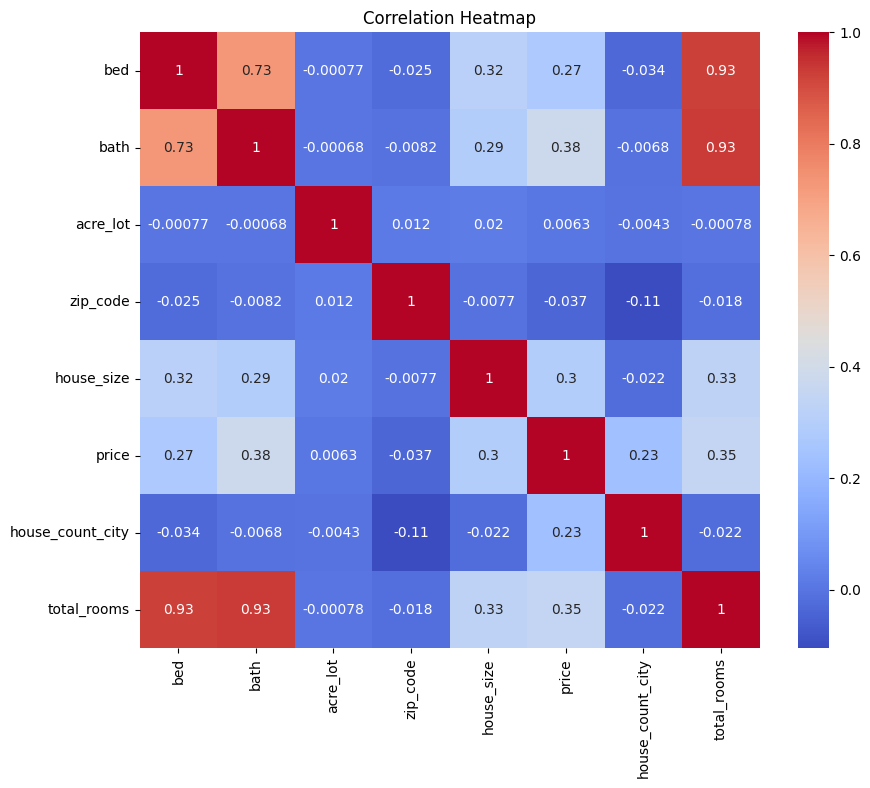

In [586]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [542]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price,house_count_city,total_rooms
count,305802.000000,305802.000000,305802.000000,305802.000000,3.058020e+05,3.058020e+05,305802.000000,305802.000000
mean,3.401822,2.472423,7.657039,2552.133119,2.047082e+03,7.684473e+05,4107.945481,5.874245
std,2.223247,2.338829,470.156519,1629.723260,3.354057e+03,1.298049e+06,9332.471201,4.244284
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00,1.000000,2.000000
25%,3.000000,2.000000,0.110000,1605.000000,1.200000e+03,2.490000e+05,336.000000,4.000000
50%,3.000000,2.000000,0.240000,2151.000000,1.500000e+03,4.600000e+05,709.000000,5.000000
75%,4.000000,3.000000,1.030000,3052.000000,2.395000e+03,7.990000e+05,1583.000000,6.000000
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07,31502.000000,297.000000


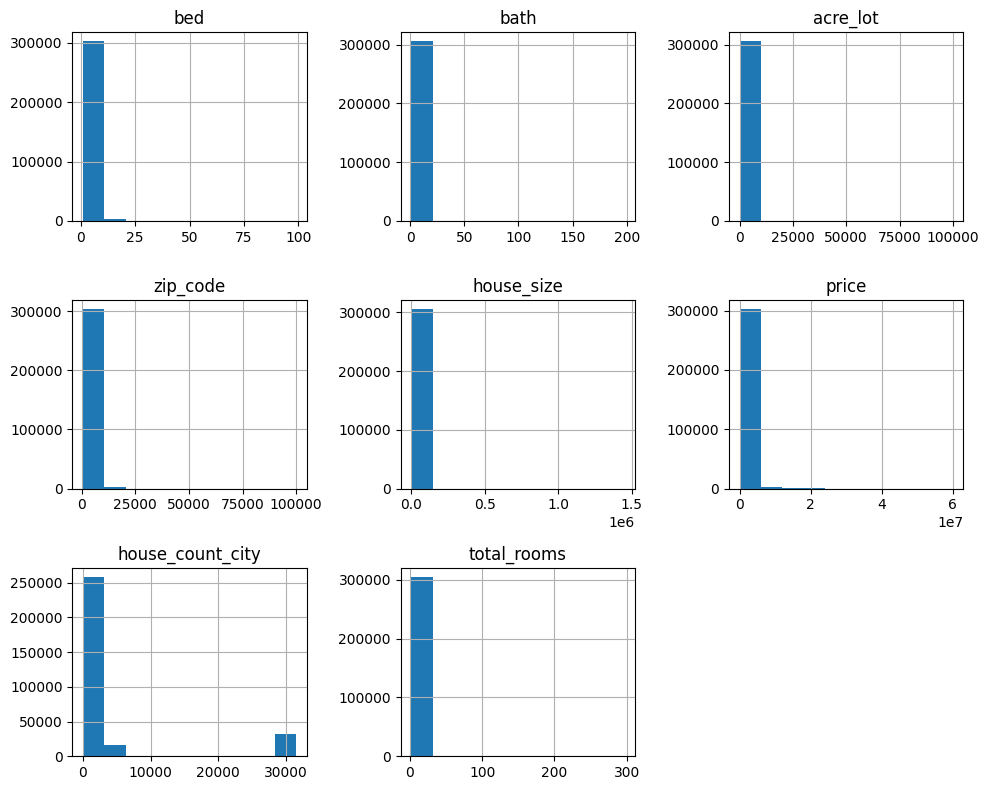

In [543]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

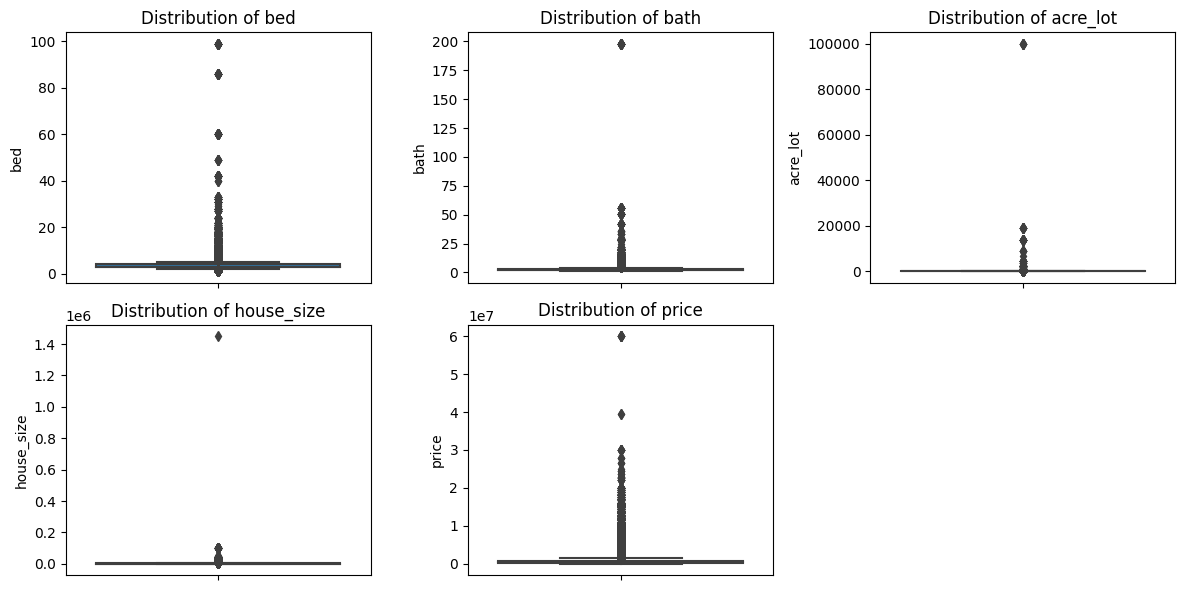

In [544]:
columns_for_outliers = ['bed', 'bath', 'acre_lot', 'house_size','price']

plt.figure(figsize=(12, 6))    
for i, col in enumerate(columns_for_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Drop Outliers

In [587]:
def outlier_treatment(datacolumn):
    """function to Remove outlier"""
    datacolumn = sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range,IQR

In [588]:
def count_outliers(feature):
    l, u, IQR = outlier_treatment(df[feature])
    count = 0
    if IQR != 0:
        count += len(df[(df[feature] > u) | (df[feature] < l)])
    print("lower: ",l,"- upper: ", u)
    print("will be dropped: ",count)
    return count

In [589]:
def drop_outliers(feature):
    l,u, IQR = outlier_treatment(df[feature])
    if IQR!=0:
        df.drop(df[ (df[feature] > u) | (df[feature] < l)].index,inplace=True)

In [590]:
for column in columns_for_outliers:
    print(column)
    count_outliers(column)

bed
lower:  1.5 - upper:  5.5
will be dropped:  40131
bath
lower:  0.5 - upper:  4.5
will be dropped:  18628
acre_lot
lower:  -1.27 - upper:  2.41
will be dropped:  45357
house_size
lower:  -592.5 - upper:  4187.5
will be dropped:  21754
price
lower:  -576000.0 - upper:  1624000.0
will be dropped:  27402


In [591]:
drop_outliers("price")
drop_outliers("acre_lot")

In [592]:
df.shape

(237525, 11)

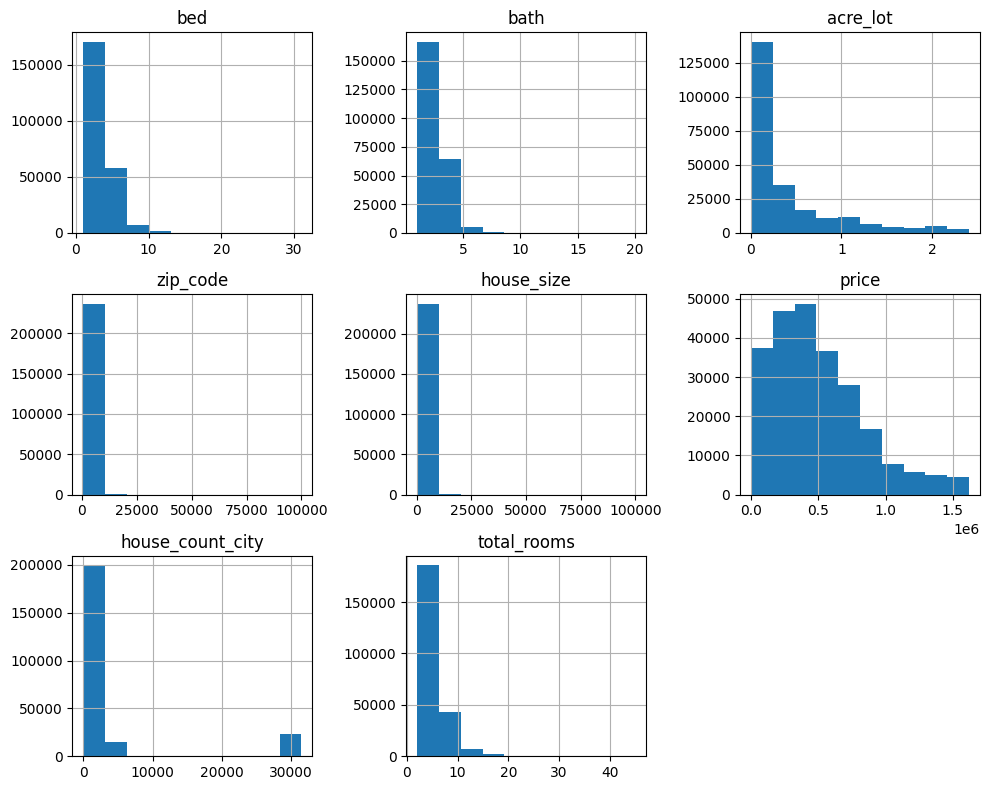

In [593]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

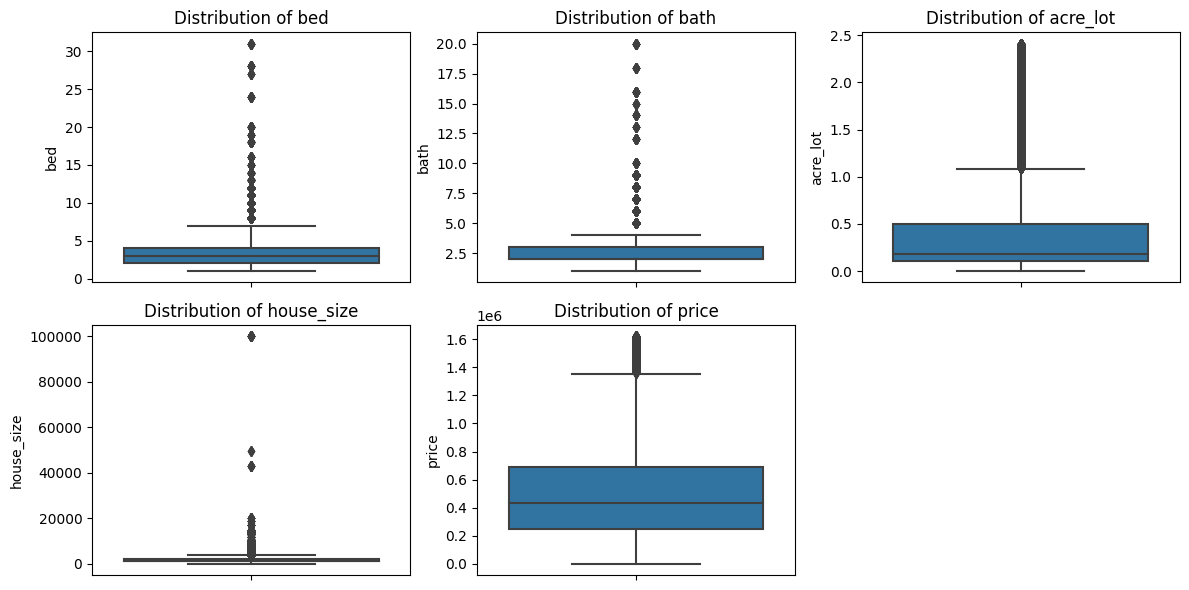

In [594]:
plt.figure(figsize=(12, 6))    
for i, col in enumerate(columns_for_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [553]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,237525.0,3.260486,1.673524,1.0,2.00,3.00,4.0,31.00
bath,237525.0,2.227606,1.070818,1.0,2.00,2.00,3.0,20.00
acre_lot,237525.0,0.420909,0.512127,0.0,0.11,0.18,0.5,2.41
zip_code,237525.0,2478.753727,1565.407512,601.0,1602.00,2145.00,2909.0,99999.00
house_size,237525.0,1824.705054,1554.460041,100.0,1172.00,1470.00,2212.0,99999.00
price,237525.0,500559.717301,344219.939288,1.0,249000.00,429900.00,689900.0,1620000.00
house_count_city,237525.0,3976.077028,9039.885691,1.0,388.00,755.00,1808.0,31502.00
total_rooms,237525.0,5.488092,2.480406,2.0,4.00,5.00,6.0,45.00


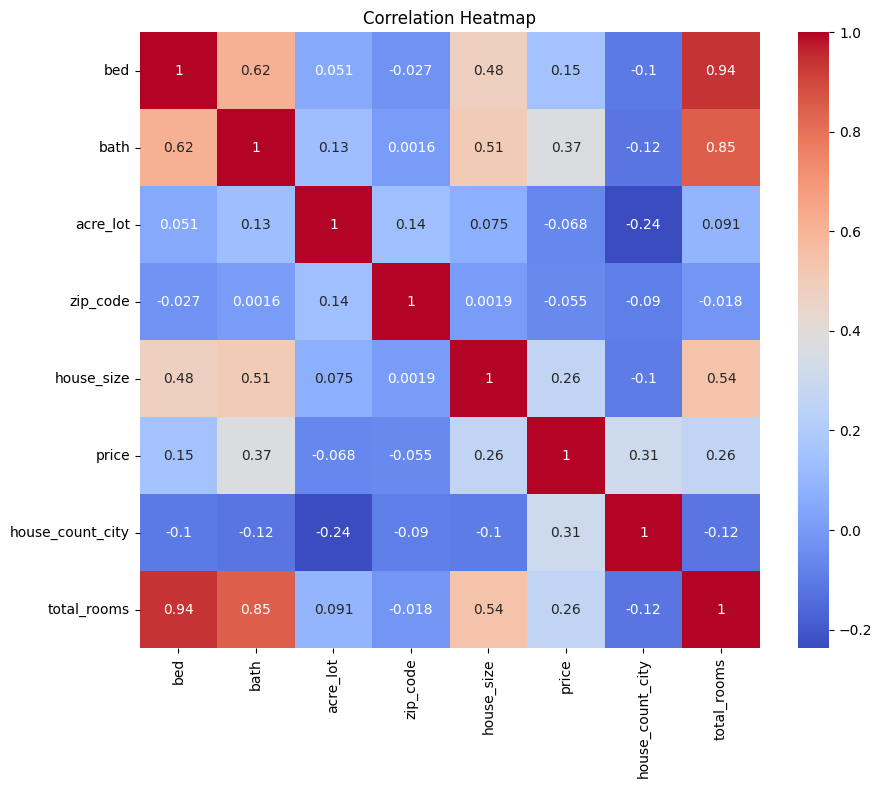

In [554]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Label Encoding

In [595]:
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['city'] = le.fit_transform(df['city'])
df['state'] = le.fit_transform(df['state'])

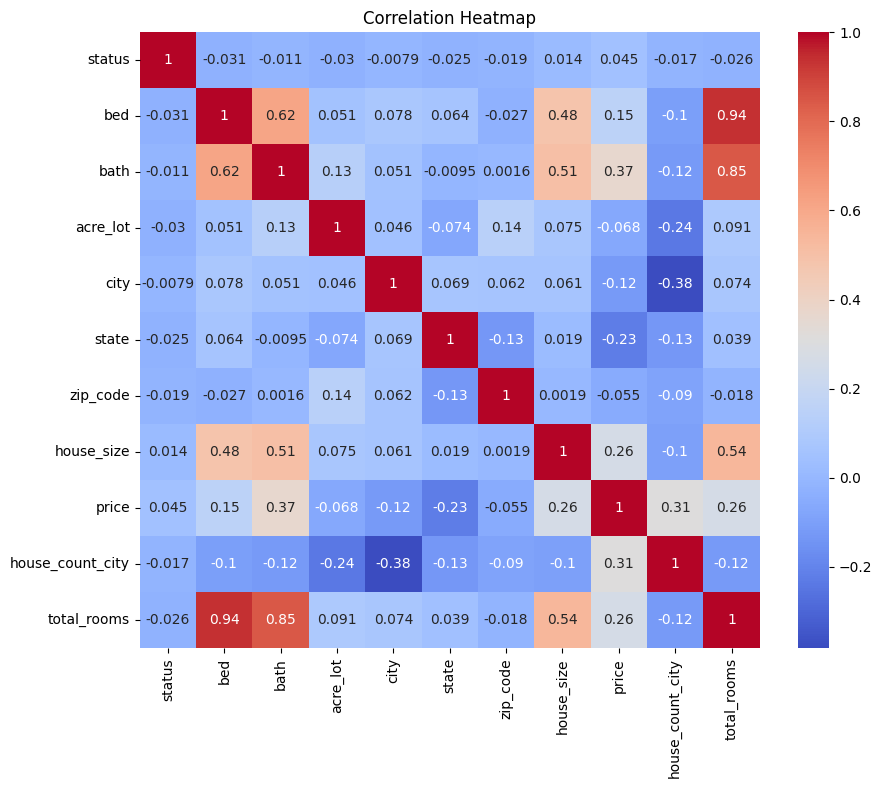

In [596]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [557]:
#df = pd.get_dummies(df, columns=['city', 'state'])

In [597]:
df['zip_code'] = StandardScaler().fit_transform(df['zip_code'].values.reshape(len(df), 1))

In [598]:
df['bed'] = MinMaxScaler().fit_transform(df['bed'].values.reshape(len(df), 1))
df['bath'] = MinMaxScaler().fit_transform(df['bath'].values.reshape(len(df), 1))
df['acre_lot'] = MinMaxScaler().fit_transform(df['acre_lot'].values.reshape(len(df), 1))
df['status'] =  MinMaxScaler().fit_transform(df['status'].values.reshape(len(df), 1))
df['house_count_city'] =  MinMaxScaler().fit_transform(df['house_count_city'].values.reshape(len(df), 1))
df['total_rooms'] =  MinMaxScaler().fit_transform(df['total_rooms'].values.reshape(len(df), 1))
df['house_size'] = MinMaxScaler().fit_transform(df['house_size'].values.reshape(len(df), 1))
df['price'] = MinMaxScaler().fit_transform(df['price'].values.reshape(len(df), 1))

## Splitting Data

In [599]:
X = df.drop(['price','zip_code'], axis = 1)
y = df['price']

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Training Model

## 1. Linear Regression

In [624]:
reg = LinearRegression()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

In [625]:
reg.score(X_train, y_train)

0.31857568839110684

In [636]:
lr_mae = metrics.mean_absolute_error(y_test, preds)
lr_mse = metrics.mean_squared_error(y_test, preds)
lr_r2 = reg.score(X_test,y_test)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))

print('MAE:',lr_mae)
print('MSE:',lr_mse)
print('RMSE:',lr_rmse)
print('R2 Score: ',lr_r2)

MAE: 0.13294254114279921
MSE: 0.03043956409635349
RMSE: 0.1744693786781895
R2 Score:  0.32379928131694713


## 2. Random Forest Regression

In [637]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
y_pred = rf_regressor.predict(X_test)

In [638]:
rf_score = r2_score(y_test, y_pred)
rf_mse = metrics.mean_squared_error(y_test, y_pred)
rf_mae = metrics.mean_absolute_error(y_test, y_pred)
rf_rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

print('R2 Score:', rf_score)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

R2 Score: 0.9912081947136551
Mean Squared Error: 0.023542150594070558
Mean Absolute Error: 0.11361487786456544
Root Mean Squared Error: 0.15343451565430302


## 3. Decision Tree Regression


In [629]:
model_DT = DecisionTreeRegressor(max_depth=5)
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

In [641]:
mse_DT = metrics.mean_squared_error(y_test, y_pred)
rmse_DT = metrics.mean_squared_error(y_test, y_pred, squared=False)
mae_DT = metrics.mean_absolute_error(y_test, y_pred)
r2_DT = model_DT.score(X_test,y_test)

print('MAE:',mae_DT)
print('MSE:',rmse_DT)
print('RMSE:',rmse_DT)
print('R2:',r2_DT)

MAE: 0.0031931473741186977
MSE: 0.019893922924733205
RMSE: 0.019893922924733205
R2: 0.4770221051568142


## 4. K-Nearest Neighbors (KNN)

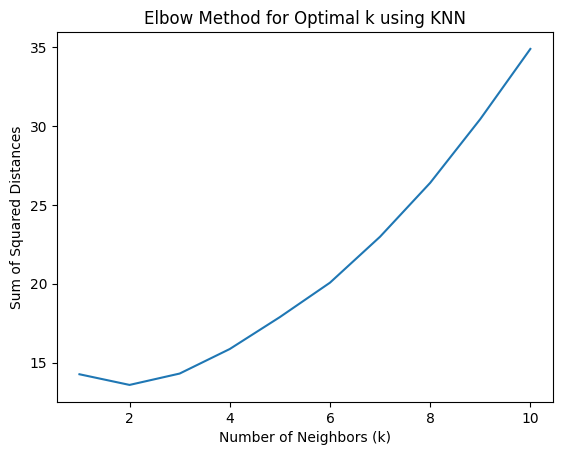

In [673]:
distances = []
k_values = range(1, 11) 

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    squared_distances = sum((y_test - predictions) ** 2) 
    distances.append(squared_distances)

plt.plot(k_values, distances)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k using KNN')
plt.show()

In [672]:
knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [671]:
knn_score = knn.score(X_test, y_test)
knn_mse = metrics.mean_squared_error(y_test, y_pred)
knn_mae = metrics.mean_absolute_error(y_test, y_pred)
knn_rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

print('KNN Score:', knn_score)
print('Mean Squared Error:', knn_mse)
print('Mean Absolute Error:', knn_mae)
print('Root Mean Squared Error:', knn_rmse)

KNN Score: 0.9812374129314159
Mean Squared Error: 0.000844608643421564
Mean Absolute Error: 0.00610445991745388
Root Mean Squared Error: 0.02906215139010813


## 1. Artificial Neural Network (ANN)


In [674]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

In [675]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [676]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100


C:\Users\Berkay\anaconda3\envs\newest\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


6013/6013 [==============================] - 7s 1ms/step - loss: 0.2745 - val_loss: 0.4894
Epoch 2/100
6013/6013 [==============================] - 8s 1ms/step - loss: 0.1095 - val_loss: 0.0357
Epoch 3/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0607 - val_loss: 0.0340
Epoch 4/100
6013/6013 [==============================] - 9s 1ms/step - loss: 0.0459 - val_loss: 0.0316
Epoch 5/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0371 - val_loss: 0.0316
Epoch 6/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0338 - val_loss: 0.0317
Epoch 7/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0326 - val_loss: 0.0295
Epoch 8/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0303 - val_loss: 0.0283
Epoch 9/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0286 - val_loss: 0.0265
Epoch 10/100
6013/6013 [==============================] - 7s 1ms/step - loss: 0.0277 

In [677]:
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

743/743 [==============================] - 1s 898us/step - loss: 0.0204
Test loss: 0.020351119339466095


In [679]:
y_pred = model.predict(X_test)

ann_mae = metrics.mean_absolute_error(y_test, y_pred)
ann_mse = metrics.mean_squared_error(y_test, y_pred)
ann_rmse = mse**0.5
ann_r2 = metrics.r2_score(y_test, y_pred)

print("Test loss:", loss)
print("Mean Absolute Error:", ann_mae)
print("Mean Squared Error:", ann_mse)
print("Root Mean Squared Error:", ann_rmse)
print("R2 Score:", ann_r2)

743/743 [==============================] - 1s 885us/step
Test loss: 0.020351119339466095
Mean Absolute Error: 0.10603250094101276
Mean Squared Error: 0.020351112572873305
Root Mean Squared Error: 0.14265732568947626
R2 Score: 0.5479095264236982


### Model Comparison

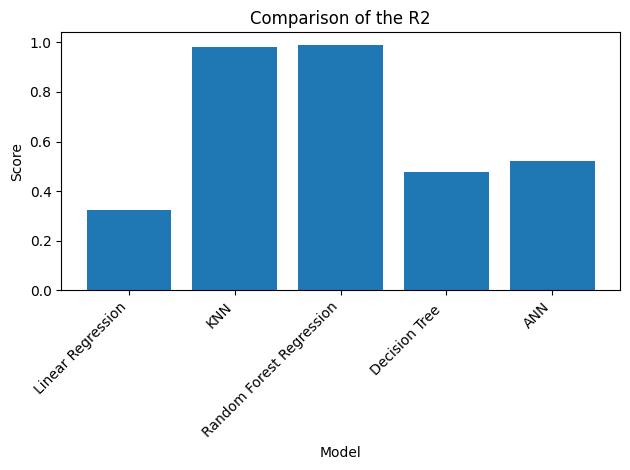

In [633]:
model_names = ['Linear Regression', 'KNN', 'Random Forest Regression','Decision Tree ','ANN']
scores = [reg.score(X_test,y_test), knn_score, rf_score,r2_DT,r2_ann]

fig, ax = plt.subplots()

plt.bar(np.arange(len(model_names)), scores)
ax.set_xticks(np.arange(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of the R2')
plt.tight_layout()
plt.show()

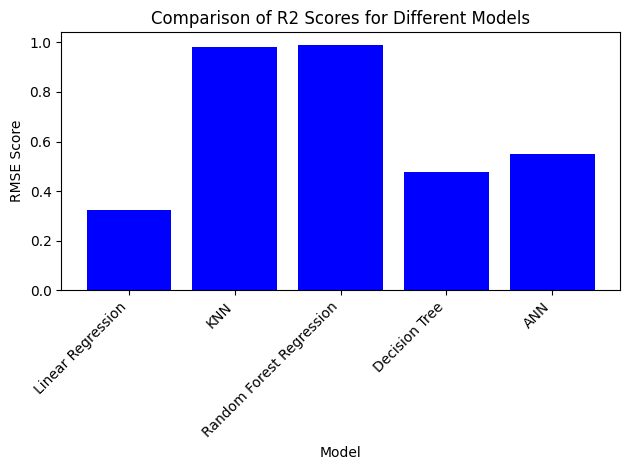

In [682]:
model_names = ['Linear Regression', 'KNN', 'Random Forest Regression', 'Decision Tree', 'ANN']
rmse_scores = [lr_r2, knn_score, rf_score, r2_DT, ann_r2] 

fig, ax = plt.subplots()

plt.bar(np.arange(len(model_names)), rmse_scores, color='blue')
ax.set_xticks(np.arange(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.tight_layout()
plt.show()

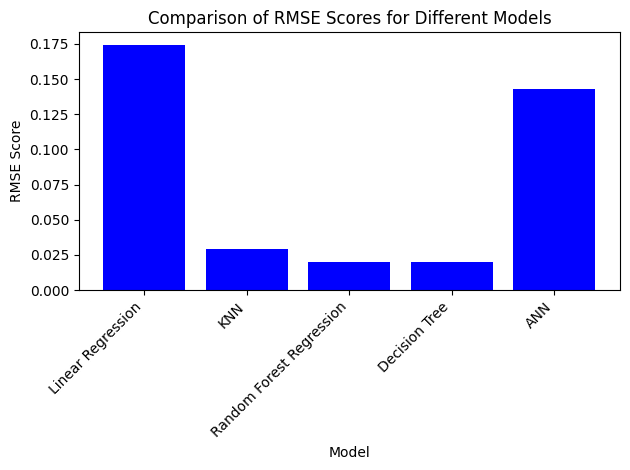

In [681]:
model_names = ['Linear Regression', 'KNN', 'Random Forest Regression', 'Decision Tree', 'ANN']
rmse_scores = [lr_rmse, knn_rmse, rf_rmse, rmse_DT, ann_rmse] 

fig, ax = plt.subplots()

plt.bar(np.arange(len(model_names)), rmse_scores, color='blue')
ax.set_xticks(np.arange(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.title('Comparison of RMSE Scores for Different Models')
plt.tight_layout()
plt.show()